# This is the code for feature extraction, matching and pose estimation using OpenCV

In [32]:
# !pip3 uninstall opencv-python
!pip install opencv-contrib-python

# ORB Feature Extractor 

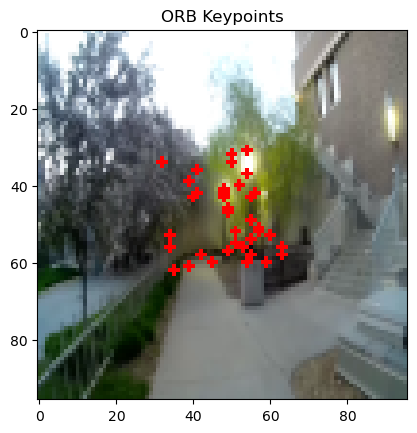

In [33]:
import cv2
import matplotlib.pyplot as plt

def main():
    # Load the image
    image_path = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc/0473_0.png"  # specify your image path here
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Image not found")
        return

    # Convert to grayscale as ORB works with grayscale images
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize ORB object
    orb = cv2.ORB_create()

    # Check if ORB is available in your version of OpenCV
    if orb is None:
        print("ORB not available in this OpenCV version.")
        return

    # Find keypoints and descriptors with ORB
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)

    # Draw keypoints on the original image (output image will be in color)
    # img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255,0,0), 4)

    for keypoint in keypoints:
        img = cv2.circle(img, (int(keypoint.pt[0]), int(keypoint.pt[1])), radius=1, color=(0, 0, 255), thickness=-1)

    # Display the image with detected keypoints
    # plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('ORB Keypoints')
    plt.show()

if __name__ == "__main__":
    main()


# SIFT Feature Extractor

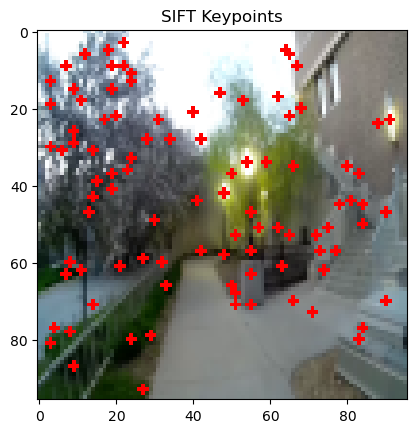

In [34]:
import cv2
import matplotlib.pyplot as plt

def main():
    # Load the image
    image_path = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc/0473_0.png"  # specify your image path here
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Image not found")
        return

    # Convert to grayscale (SIFT works with grayscale images)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT object
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)

    # Draw keypoints on the original image (output image will be in color)
    # img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255,0,0), 4)

    # Draw red dots on each keypoint location
    for keypoint in keypoints:
        img = cv2.circle(img, (int(keypoint.pt[0]), int(keypoint.pt[1])), radius=1, color=(0, 0, 255), thickness=-1)


    # Display the image with detected keypoints
    # plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints')
    plt.show()

if __name__ == "__main__":
    main()


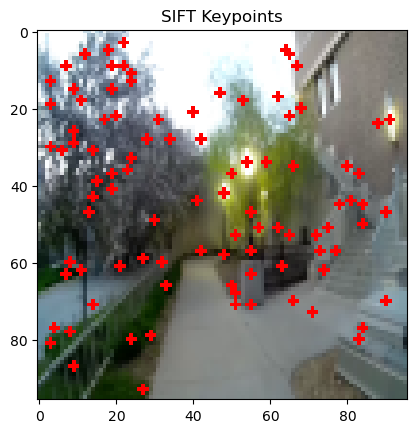

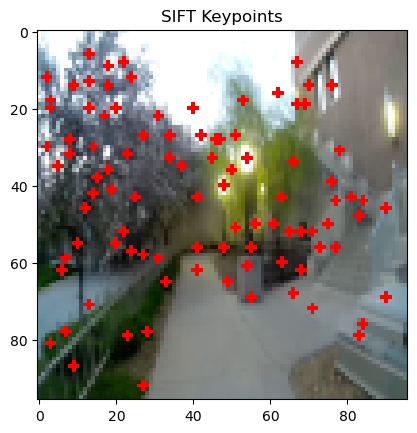

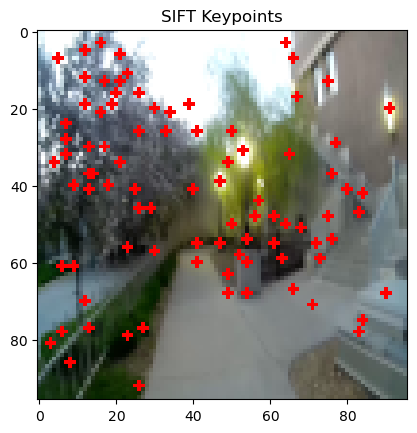

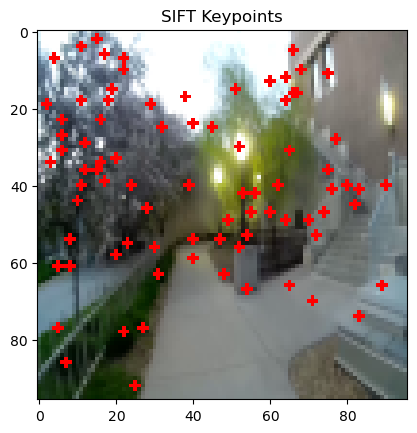

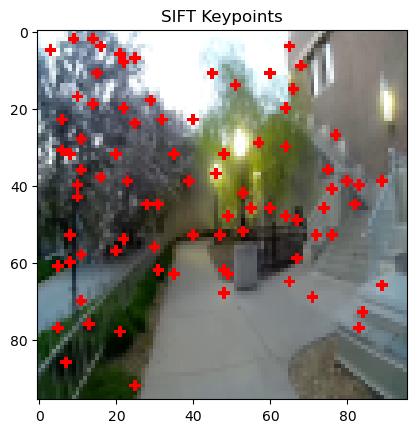

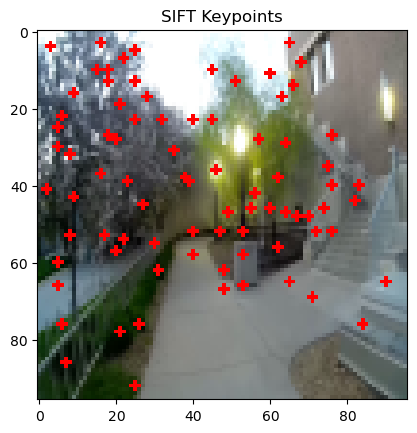

In [35]:
import cv2
import matplotlib.pyplot as plt
import os

def process_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Image not found at {image_path}")
        return

    # Convert to grayscale (SIFT works with grayscale images)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT object
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)

    # Draw red dots on each keypoint location
    for keypoint in keypoints:
        img = cv2.circle(img, (int(keypoint.pt[0]), int(keypoint.pt[1])), radius=1, color=(0, 0, 255), thickness=-1)

    # Display the image with detected keypoints
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints')
    plt.show()

def main():
    base_folder = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc"
    file_prefix = "0473_"
    file_extension = ".png"

    # Loop through the first 6 images
    for i in range(6):
        image_filename = f"{file_prefix}{i}{file_extension}"
        image_path = os.path.join(base_folder, image_filename)
        
        if os.path.exists(image_path):
            process_image(image_path)
        else:
            print(f"File does not exist: {image_path}")

if __name__ == "__main__":
    main()


# Feature matching between the adjectent images: 

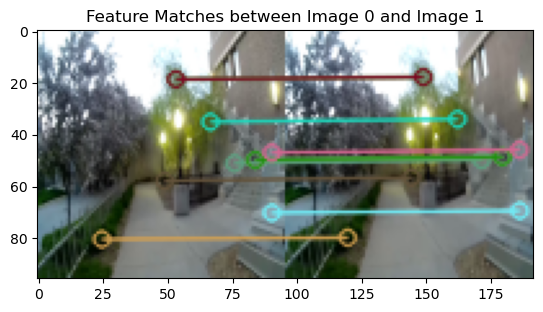

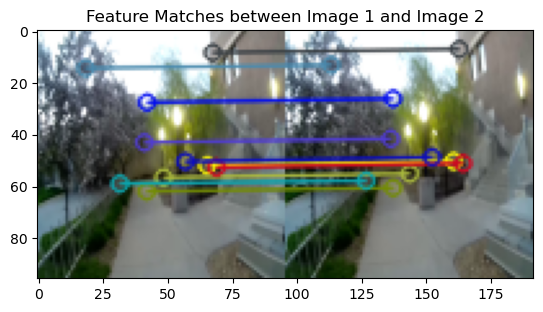

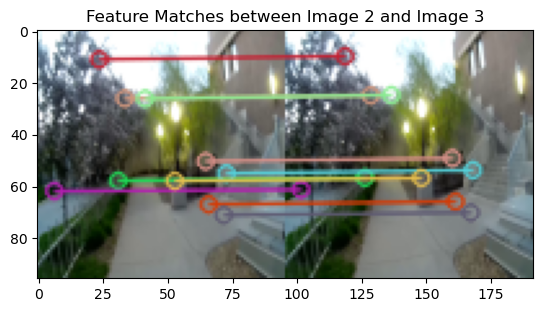

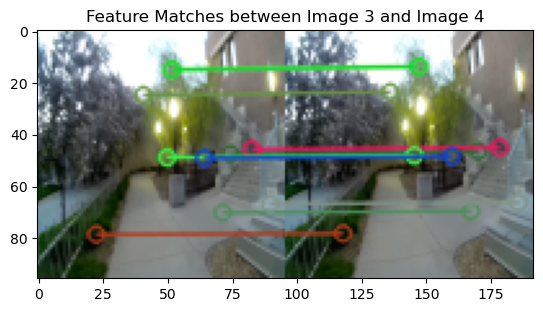

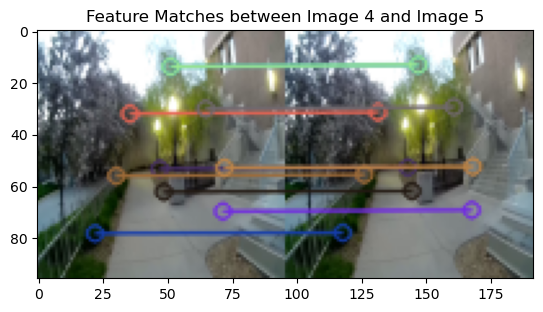

In [36]:
import cv2
import matplotlib.pyplot as plt
import os

def feature_match(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in ascending order of their distances so that best matches (with low distance) come to front
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches

def main():
    base_folder = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc"
    file_prefix = "0473_"
    file_extension = ".png"

    images = []

    # Load the first 6 images
    for i in range(6):
        image_filename = f"{file_prefix}{i}{file_extension}"
        image_path = os.path.join(base_folder, image_filename)
        
        if os.path.exists(image_path):
            img = cv2.imread(image_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Error loading image: {image_path}")
        else:
            print(f"File does not exist: {image_path}")

    # Perform feature matching between sequential images
    for i in range(len(images) - 1):
        img_matches = feature_match(images[i], images[i + 1])

        # Show the matches
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.title(f'Feature Matches between Image {i} and Image {i+1}')
        plt.show()

if __name__ == "__main__":
    main()


# Modifed to extract and match more features: 

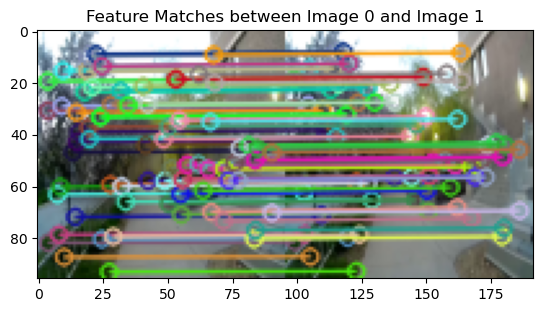

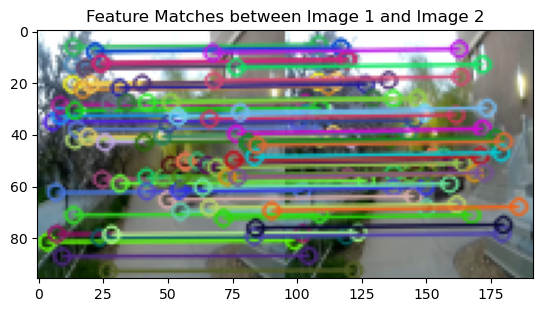

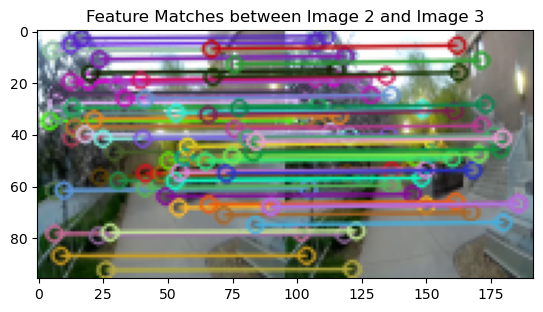

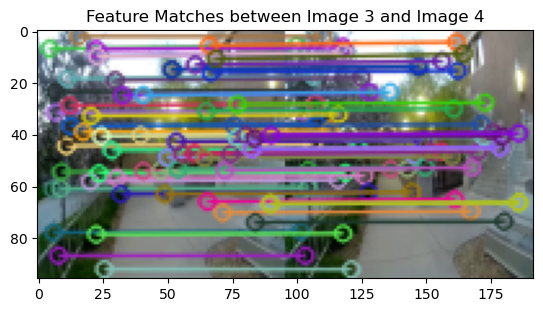

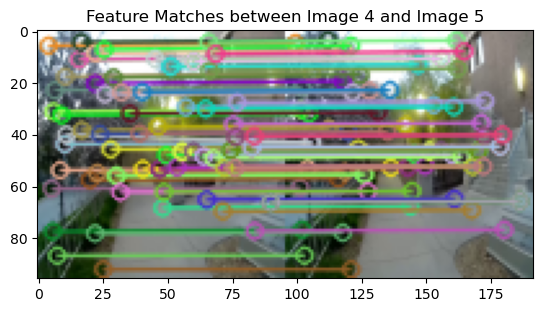

In [37]:
import cv2
import matplotlib.pyplot as plt
import os

def feature_match(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)  # specify the number of times the trees in the index should be recursively traversed

    # Create FLANN matcher object
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors using FLANN
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to get good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw good matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches

def main():
    base_folder = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc"
    file_prefix = "0473_"
    file_extension = ".png"

    images = []

    # Load the first 6 images
    for i in range(6):
        image_filename = f"{file_prefix}{i}{file_extension}"
        image_path = os.path.join(base_folder, image_filename)
        
        if os.path.exists(image_path):
            img = cv2.imread(image_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Error loading image: {image_path}")
        else:
            print(f"File does not exist: {image_path}")

    # Perform feature matching between sequential images
    for i in range(len(images) - 1):
        img_matches = feature_match(images[i], images[i + 1])

        # Show the matches
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.title(f'Feature Matches between Image {i} and Image {i+1}')
        plt.show()

if __name__ == "__main__":
    main()


# Camera Intrinstic Matrix Calibration Process 

In [38]:
# import numpy as np
# import cv2
# import glob

# # Prepare object points like (0,0,0), (1,0,0), (2,0,0), ..., (6,5,0)
# objp = np.zeros((6*7,3), np.float32)
# objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images
# objpoints = [] # 3d points in real world space
# imgpoints = [] # 2d points in image plane

# # List of calibration images
# images = glob.glob('path/to/calibration/images/*.jpg') # to be collected here 

# for fname in images:
#     img = cv2.imread(fname)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Find the chessboard corners
#     ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

#     # If found, add object points, image points
#     if ret == True:
#         objpoints.append(objp)
#         imgpoints.append(corners)

#         # Draw and display the corners
#         cv2.drawChessboardCorners(img, (7,6), corners, ret)
#         cv2.imshow('img', img)
#         cv2.waitKey(500)

# cv2.destroyAllWindows()

# # Calibration
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# # mtx contains the camera matrix
# print("Camera Matrix: ")
# print(mtx)

# # Save the camera matrix for later use
# np.save('camera_matrix.npy', mtx)


# Below is an assumed camera intrinstic matrix for easier process:

In [39]:
import math

# Image dimensions
width = 1920
height = 1080

# Assume a moderate horizontal field of view
fov_degrees = 60
fov_radians = math.radians(fov_degrees)

# Estimate the focal length based on the assumed FOV
f = (width / 2) / math.tan(fov_radians / 2)

# Construct the intrinsic camera matrix
K = [[f, 0, width / 2],
     [0, f, height / 2],
     [0, 0, 1]]

print("Estimated intrinsic camera matrix: ")
print(K)


Estimated intrinsic camera matrix: 
[[1662.7687752661227, 0, 960.0], [0, 1662.7687752661227, 540.0], [0, 0, 1]]


In [40]:
import cv2
import numpy as np
import os

# def estimate_motion(matched_features, K):
#     # Unpack keypoints and descriptors
#     keypoints1, keypoints2, good_matches = matched_features

#     # Extract location of good matches
#     points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
#     points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

#     for i, match in enumerate(good_matches):
#         points1[i, :] = keypoints1[match.queryIdx].pt
#         points2[i, :] = keypoints2[match.trainIdx].pt

#     # Compute the essential matrix
#     E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
#     points, R, t, mask = cv2.recoverPose(E, points1, points2, K)

#     return R, t


# def estimate_motion(matched_features, K):
#     # Unpack keypoints and descriptors
#     keypoints1, keypoints2, good_matches = matched_features

#     # Extract location of good matches
#     points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
#     points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

#     for i, match in enumerate(good_matches):
#         points1[i, :] = keypoints1[match.queryIdx].pt
#         points2[i, :] = keypoints2[match.trainIdx].pt

#     # Ensure arrays are continuous
#     points1 = np.copy(points1)
#     points2 = np.copy(points2)

#     # Compute the essential matrix
#     E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
#     points, R, t, mask = cv2.recoverPose(E, points1, points2, K)

#     return R, t


def estimate_motion(matched_features, K):
    # Unpack keypoints and descriptors
    keypoints1, keypoints2, good_matches = matched_features

    # Extract location of good matches
    points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
    points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

    for i, match in enumerate(good_matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Reshape points to ensure they are 2-dimensional (NumPy should ensure they are continuous)
    points1 = points1.reshape(-1, 2)
    points2 = points2.reshape(-1, 2)

    # Compute the essential matrix
    E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
    
    inlier_pts1 = points1[mask.ravel() == 1]
    inlier_pts2 = points2[mask.ravel() == 1]

    # Recover the pose using the inlier matches
    _, R, t, _ = cv2.recoverPose(E, inlier_pts1, inlier_pts2, K)
    return R, t



# Below is the code used to sort out the images filenames 

In [41]:
import os
import re

def numerical_sort_key(filename):
    # Extract the number from the filename using regex
    numbers = re.findall(r'\d+', filename)
    # The key is a tuple of integers found in the filename
    return tuple(int(num) for num in numbers)

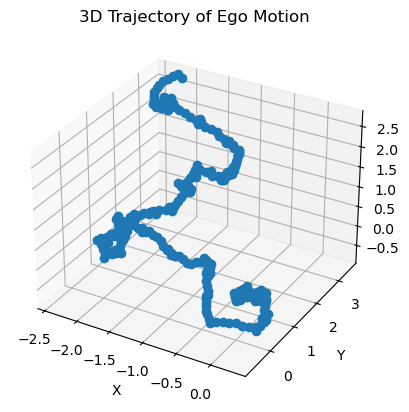

In [45]:

# Define the intrinsic matrix values
f = 1.0  # Focal length
width = 1.0  # Image width
height = 1.0  # Image height
K = np.array([[f, 0, width / 2],
            [0, f, height / 2],
            [0, 0, 1]], dtype=float)

# Define the path to your image folder
folder_path = "data_set/ego4d_images/f178b211-e532-47ef-8b2b-28a7fa4c8e0f"

# Get list of files in directory
images = os.listdir(folder_path)

# Sort the filenames using the defined key
images = sorted(images, key=numerical_sort_key)

if len(images) < 2:
    print("Not enough images to estimate motion")
    # return

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Variables for trajectory
trajectory = [np.array([0, 0, 0], dtype=np.float64)]  # Ensure it's a float array
current_pos = np.array([0, 0, 0], dtype=np.float64)   # Ensure it's a float array
current_rot = np.eye(3, dtype=np.float64)             # Ensure it's a float array


# Load the first image and find its keypoints and descriptors
first_image_path = os.path.join(folder_path, images[0])  # get the first image
old_image = cv2.imread(first_image_path, cv2.IMREAD_GRAYSCALE)

if old_image is None:
    print(f"Error loading image {images[0]}")
    # return

old_keypoints, old_descriptors = sift.detectAndCompute(old_image, None)

for i in range(1, len(images)):
    # Load the next image
    new_image_path = os.path.join(folder_path, images[i])
    new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

    if new_image is None:
        print(f"Error loading image {images[i]}")
        continue

    # Compute keypoints and descriptors
    new_keypoints, new_descriptors = sift.detectAndCompute(new_image, None)

    # Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(old_descriptors, new_descriptors, k=2)

    # Apply ratio test
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    if len(good) > 10:
        # Estimate motion
        R, t = estimate_motion((old_keypoints, new_keypoints, good), K)

        # Update current position and orientation
        current_pos += current_rot.dot(t.ravel()) * 0.1  # scale translation by elapsed time
        current_rot = R.dot(current_rot)

        # Add the current position to the trajectory
        trajectory.append(current_pos.copy())

    else:
        print(f"Not enough good matches between {images[i-1]} and {images[i]}")

    # Current becomes old
    old_image, old_keypoints, old_descriptors = new_image, new_keypoints, new_descriptors

# Plotting
trajectory = np.array(trajectory)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Trajectory of Ego Motion')
plt.show()


# Install the 3D interactive tools and VS plugin

In [ ]:
!pip install plotly

In [46]:
import plotly.graph_objects as go

# Plotting
trajectory = np.array(trajectory)

# Create a trace of 3D plot for trajectory
trace = go.Scatter3d(
    x=trajectory[:, 0],
    y=trajectory[:, 1],
    z=trajectory[:, 2],
    mode='lines+markers',
    marker=dict(
        size=4,
        color=trajectory[:, 2],  # set color to z-axis values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

# Set the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    title='3D Trajectory of Ego Motion'
)

fig = go.Figure(data=[trace], layout=layout)

# Render the plot
fig.show()